<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Stull-Ch.-2-problem-8" data-toc-modified-id="Stull-Ch.-2-problem-8-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Stull Ch. 2 problem 8</a></span></li><li><span><a href="#Getting-started-with-vapor" data-toc-modified-id="Getting-started-with-vapor-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Getting started with vapor</a></span></li><li><span><a href="#Calculate-the-horizontal-average-temperature" data-toc-modified-id="Calculate-the-horizontal-average-temperature-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calculate the horizontal average temperature</a></span><ul class="toc-item"><li><span><a href="#Calculate-the-temperature-pertubation" data-toc-modified-id="Calculate-the-temperature-pertubation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Calculate the temperature pertubation</a></span></li></ul></li><li><span><a href="#Getting-started-with-vapor" data-toc-modified-id="Getting-started-with-vapor-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Getting started with vapor</a></span></li></ul></div>

# Stull Ch. 2 problem 8

In [10]:
cpd=1004.
rho=1
h_flux_bot=rho*0.2*cpd
h_flux_top=rho*0.1*cpd
net_heating=h_flux_bot-h_flux_top  #W/m^2
delta_z=100  #meters
total_mass=rho*delta_z  #kg/m^2
dT_dt=net_heating/(total_mass*cpd)*3600 #K/hour  
print('net heating is {:5.1f} K/hour'.format(dT_dt))

net heating is   3.6 K/hour


# Getting started with vapor

1.  Fetch the netcdf file tropical.nc from my webserver (50 Mbytes)

In [2]:
from a500.utils.data_read import download
the_root = "http://clouds.eos.ubc.ca/~phil/docs/atsc500"
the_file =  "tropical_subset.nc"
out=download(the_file,root=the_root)

trying http://clouds.eos.ubc.ca/~phil/docs/atsc500/tropical_subset.nc
writing to: tropical_subset.nc
writing temporary file tropical_subset.nc_tmp
downloaded tropical_subset.nc
size = 52116281


2.  Identify the file structure using ncdump

In [9]:
!pyncdump tropical_subset.nc

NetCDF Global Attributes:
NetCDF dimension information:
	Name: x
		size: 100
		type: dtype('float32')
		units: 'm'
	Name: y
		size: 110
		type: dtype('float32')
		units: 'm'
	Name: z
		size: 112
		type: dtype('float32')
		units: 'm'
		long_name: 'height'
	Name: time
		size: 1
		type: dtype('float32')
		units: 'd'
		long_name: 'time'
NetCDF variable information for group root:
	Name: p
		dimensions: ('z',)
		size: 112
		type: dtype('float32')
		units: 'mb'
		long_name: 'pressure'
	Name: U
		dimensions: ('time', 'z', 'y', 'x')
		size: 1232000
		type: dtype('float32')
		long_name: 'X Wind Component'
		units: 'm/s'
	Name: V
		dimensions: ('time', 'z', 'y', 'x')
		size: 1232000
		type: dtype('float32')
		long_name: 'Y Wind Component'
		units: 'm/s'
	Name: W
		dimensions: ('time', 'z', 'y', 'x')
		size: 1232000
		type: dtype('float32')
		long_name: 'Z Wind Component'
		units: 'm/s'
	Name: PP
		dimensions: ('time', 'z', 'y', 'x')
		size: 1232000
		type: dtype('float32')
		long_name: 'Pressure

3.  Read a variable using the netCDF4 module:  http://unidata.github.io/netcdf4-python/

In [4]:
from netCDF4 import Dataset
#
# the variables attribute returns a dictionary of variables
#
with Dataset('tropical_subset.nc','r') as nc_in:
    print(list(nc_in.variables.keys()))
    the_temp=nc_in.variables['TABS'][...]
    print(the_temp.shape)
    #
    # remove the time dimension, since we only have one timestep
    #
    the_temp=the_temp.squeeze()
    print(the_temp.shape)
    the_height=nc_in.variables['z'][...]
    print(the_height.shape)

['x', 'y', 'z', 'time', 'p', 'U', 'V', 'W', 'PP', 'TABS', 'QV', 'QN', 'QP']
(1, 112, 110, 100)
(112, 110, 100)
(112,)


#Plotting three temperature profiles

[Text(0,0.5,'height (km)'),
 Text(0.5,0,'temperature (K)'),
 Text(0.5,1,'3 profiles')]

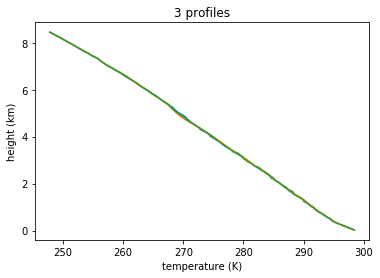

In [5]:
%matplotlib inline
#
# plot 3 arbitrary columns
#
from matplotlib import pyplot as plt
meter2km=1.e-3
random_xy=[(10,20),(80,40),(25,75)]
fig,ax=plt.subplots(1,1)
for x,y in random_xy:
    temp_profile=the_temp[:,x,y]
    ax.plot(temp_profile,the_height*meter2km)  
ax.set(xlabel='temperature (K)',ylabel='height (km)',title='3 profiles')

# Calculate the horizontal average temperature

In [6]:
print(the_temp.shape)
xmean=the_temp.mean(axis=2)
print(xmean.shape)
xymean=xmean.mean(axis=1)
print(xymean.shape)

(112, 110, 100)
(112, 110)
(112,)


## Calculate the temperature pertubation

[Text(0,0.5,'height (km)'),
 Text(0.5,0,'temperature (K)'),
 Text(0.5,1,'3 perturbation profiles')]

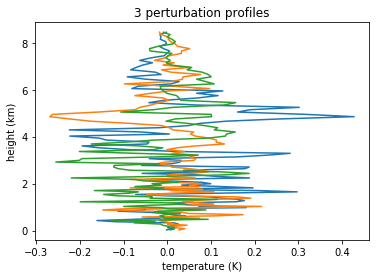

In [7]:
fig,ax=plt.subplots(1,1)
for x,y in random_xy:
    temp_profile=the_temp[:,x,y] - xymean
    ax.plot(temp_profile,the_height*meter2km)  
ax.set(xlabel='temperature (K)',ylabel='height (km)',title='3 perturbation profiles')

# Getting started with vapor

1. Install vapor per [these instructions](https://www.vapor.ucar.edu/docs/usage/getting-started-vapor)
1. Download and unzip the following file:

In [8]:
root = "http://clouds.eos.ubc.ca/~phil/docs/atsc500" 
file = "tropical.zip"
download(file,root=root)

trying http://clouds.eos.ubc.ca/~phil/docs/atsc500/tropical.zip
writing to: tropical.zip
writing temporary file tropical.zip_tmp
downloaded tropical.zip
size = 2910579


Start vapor, go to "Data -> Load dataset into current session" and see if you get a
3-d visualization of TABS